# Data Pre-processing

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [367]:
raw_data1 = pd.read_csv(r"D:\github\texture_haptic\raw_data\s3_f175_i001.txt", names=["Timestamp", "Platform", "Rotary"])

# Feature Extraction

In [368]:
I = 0.175

In [369]:
time_now = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
time_prev = pd.DataFrame({'Timestamp':raw_data1['Timestamp']})
row = pd.DataFrame({'Timestamp': [0]})
time_prev = pd.concat([row,time_prev.loc[:]]).reset_index(drop=True)
time_prev = time_prev.drop(time_prev.index[-1])
raw_data1['dt'] = time_now['Timestamp'] - time_prev['Timestamp'] 

In [370]:
dt = raw_data1['dt']
Platform_now = pd.DataFrame({'Platform':raw_data1['Platform']})
Platform_prev = pd.DataFrame({'Platform':raw_data1['Platform']})
row = pd.DataFrame({'Platform': [0]})
Platform_prev = pd.concat([row,Platform_prev.loc[:]]).reset_index(drop=True)
Platform_prev = Platform_prev.drop(Platform_prev.index[-1])
difference = (Platform_now['Platform'] - Platform_prev['Platform'] )
raw_data1['Platform Velocity'] = difference.div(dt)
raw_data1['Platform Velocity'] = raw_data1['Platform Velocity'].rolling(10).mean()*1e-6

#df["result"] = df["col1"]/df["col2"]
dt

0         0.000139
1         0.000103
2         0.000043
3         0.000022
4         0.000021
            ...   
399995    0.000019
399996    0.000019
399997    0.000019
399998    0.000019
399999    0.000019
Name: dt, Length: 400000, dtype: float64

In [371]:
Rotary_now = pd.DataFrame({'Rotary':raw_data1['Rotary']})
Rotary_prev = pd.DataFrame({'Rotary':raw_data1['Rotary']})
row = pd.DataFrame({'Rotary': [0]})
Rotary_prev = pd.concat([row,Rotary_prev.loc[:]]).reset_index(drop=True)
Rotary_prev = Rotary_prev.drop(Rotary_prev.index[-1])
difference = (Rotary_now['Rotary'] - Rotary_prev['Rotary'] )
raw_data1['Rotary Velocity'] = difference.div(dt)
raw_data1['Rotary Velocity'] = raw_data1['Rotary Velocity'].rolling(300).mean()*1e-6


In [372]:
raw_data1['Current'] = [I]*len(raw_data1)

In [373]:
raw_data1

,Timestamp,Platform,Rotary,dt,Platform Velocity,Rotary Velocity,Current
0,0.000139,0,0,0.000139,NaN,NaN,0.175
1,0.000242,0,0,0.000103,NaN,NaN,0.175
2,0.000285,0,0,0.000043,NaN,NaN,0.175
3,0.000307,0,0,0.000022,NaN,NaN,0.175
4,0.000328,0,0,0.000021,NaN,NaN,0.175
...,...,...,...,...,...,...,...
399995,7.821997,111401,113,0.000019,0.020789,0.001861,0.175
399996,7.822016,111402,113,0.000019,0.020789,0.001861,0.175
399997,7.822035,111402,113,0.000019,0.020789,0.001861,0.175
399998,7.822054,111403,113,0.000019,0.020789,0.001685,0.175


In [374]:
start1 = np.where([raw_data1['Timestamp']<1.9])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>7.1])
end1 = end1[1][0]


In [375]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

,Timestamp,Platform,Rotary,dt,Platform Velocity,Rotary Velocity,Current
98547,1.900005,17606,-77,0.000019,0.010526,0.000526,0.175
98548,1.900024,17606,-77,0.000019,0.010526,0.000526,0.175
98549,1.900043,17606,-77,0.000019,0.010526,0.000526,0.175
98550,1.900062,17607,-77,0.000019,0.010526,0.000526,0.175
98551,1.900081,17607,-77,0.000019,0.010526,0.000526,0.175
...,...,...,...,...,...,...,...
363485,7.099918,94087,-94,0.000019,0.020050,-0.000566,0.175
363486,7.099937,94087,-95,0.000019,0.020050,-0.000742,0.175
363487,7.099956,94087,-95,0.000019,0.015288,-0.000742,0.175
363488,7.099975,94087,-95,0.000019,0.015288,-0.000742,0.175


In [376]:
Timestamp1 = sliced_data1['Timestamp'] 
Platform_disp1 = sliced_data1['Platform']
Rotary_disp1 = sliced_data1['Rotary']*5-sliced_data1['Rotary'].mean()*5
sliced_data1['Rotary'] = Rotary_disp1


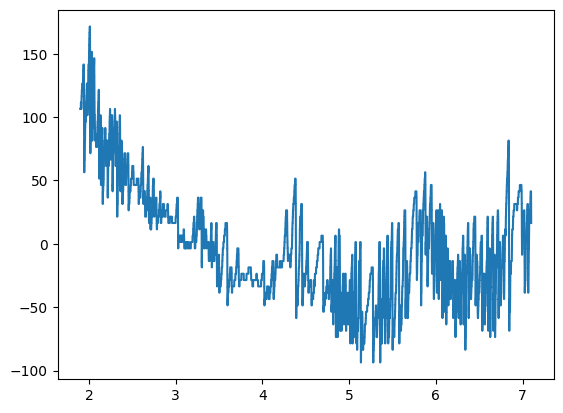

In [377]:
fig = plt.figure()
plt.plot(Timestamp1,Rotary_disp1)

In [362]:
sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']

# Slicing and Writing to seperate files (52450 per file)

In [363]:
#Slice_count = np.where([sliced_data1['Timestamp']<=4])
#Slice_count = Slice_count[1][-1]
Slice_count = 52450

In [364]:
sliced_data1 = sliced_data1.drop("dt",axis=1)

In [365]:
for i in range(5):
    data = sliced_data1[i*(Slice_count):(i+1)*(Slice_count)]
    data['Timestamp'] = data['Timestamp'] - data.iloc[0]['Timestamp']
    data['Platform'] = data['Platform'] - data.iloc[0]['Platform']
    data['Rotary'] = data['Rotary'] - data['Rotary'].mean() 
    data.to_csv(r"D:\FYP_ML\sliced_data\s3_f175_i001_" + str(i+1) +".csv",index=False)
